In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

parent_dir = os.path.dirname(os.path.realpath('../analysis'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

# Import the module from the parent directory
import analysis.model_assessment
import analysis.train_data_analysis

In [5]:
data = np.load('../../train_no_clouds.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 743)
wv_by_scene = np.split(wv, 743)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print(scenes.shape)
print(wv_by_scene.shape)

bad = []
for i in range(wv_by_scene.shape[0]):
    scene = wv_by_scene[i].copy()
    if scene[np.where((scene > 5) | (scene < 0))].shape[0] != 0:
        bad.append(i)

wv_by_scene = np.delete(wv_by_scene, bad, axis = 0)
scenes = np.delete(scenes, bad, axis = 0)

scenes = scenes[:, :, 60:100]

print(scenes.shape)
print(wv_by_scene.shape)

(743, 1242, 285)
(743, 1242)
(649, 1242, 40)
(649, 1242)


In [10]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(649, 100)
#X_idx = np.arange(649)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)
print('X train index: ', X_train_idx) 
print('y train index: ', y_train_idx) 
print('X test index: ', X_test_idx) 
print('y test index: ', y_test_idx) 

X train:  (99360, 40)
y train:  (99360,)
X test:  (24840, 40)
y test :  (24840,)
X train index:  [387 270  80 471 288  99 191  87 205 492 592  64 295 454 647 166 475 160
 504   1 214 435 600 251 427 379  62 378 243 508 372 315 252 459 560 105
 121 343 387 418 337 455 389 474 102 339 330 461 401 476 561 156  14  58
 128 413  40 565  20 345 510 273 385 614  21 566  52 555 269 270  20 276
 138 201  71 498 189 458 391 241]
y train index:  [387 270  80 471 288  99 191  87 205 492 592  64 295 454 647 166 475 160
 504   1 214 435 600 251 427 379  62 378 243 508 372 315 252 459 560 105
 121 343 387 418 337 455 389 474 102 339 330 461 401 476 561 156  14  58
 128 413  40 565  20 345 510 273 385 614  21 566  52 555 269 270  20 276
 138 201  71 498 189 458 391 241]
X test index:  [187 216 313 130 484 646 366 343  34 564 491 161 520 308  13 106 130  91
 466 562]
y test index:  [187 216 313 130 484 646 366 343  34 564 491 161 520 308  13 106 130  91
 466 562]


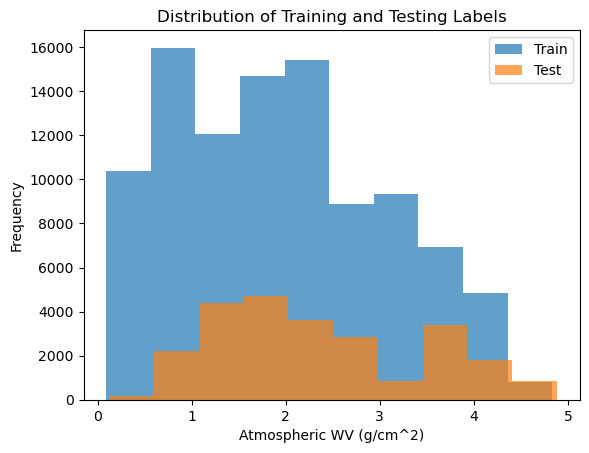

In [11]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

Text(0.5, 1.0, 'Gaussian KDE Scatter Plot for DT')

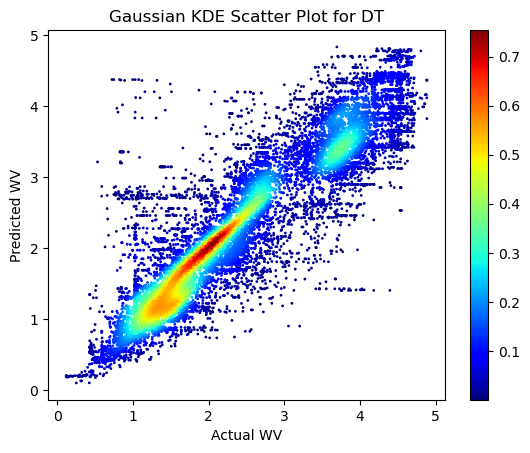

In [7]:
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import gaussian_kde

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

xy_model = np.vstack([y_test, y_pred])
z_model = gaussian_kde(xy_model)(xy_model)
plt.scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
plt.colorbar()
plt.xlabel('Actual WV')
plt.ylabel('Predicted WV')
plt.title('Gaussian KDE Scatter Plot for DT')

In [12]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(649, 300)
#X_idx = np.arange(649)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()

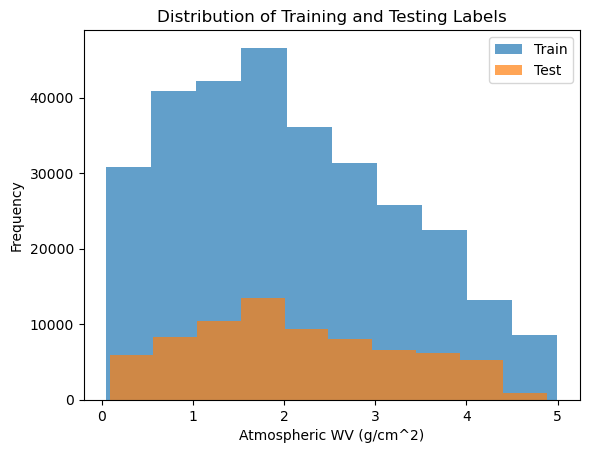

In [13]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

Text(0.5, 1.0, 'Gaussian KDE Scatter Plot for DT 300 scenes')

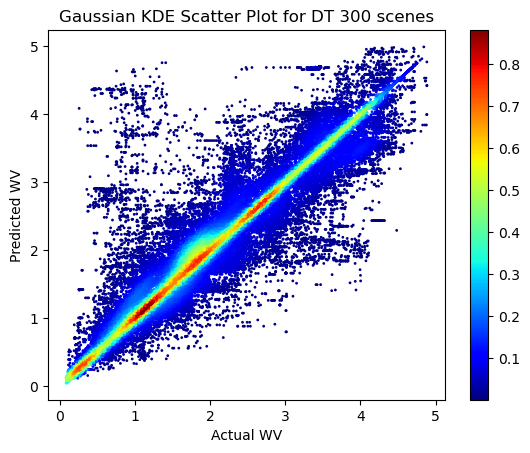

In [14]:
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import gaussian_kde

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

xy_model = np.vstack([y_test, y_pred])
z_model = gaussian_kde(xy_model)(xy_model)
plt.scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
plt.colorbar()
plt.xlabel('Actual WV')
plt.ylabel('Predicted WV')
plt.title('Gaussian KDE Scatter Plot for DT 300 scenes')

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.19882427649300516


In [17]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
#X_idx = np.random.choice(649, 300)
X_idx = np.arange(649)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()

0.2812487311535025


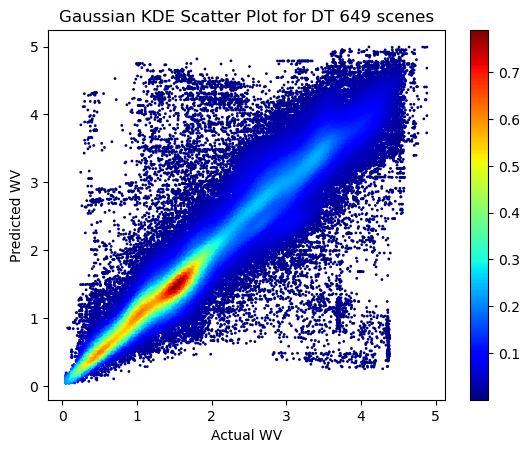

In [18]:
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import gaussian_kde

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

xy_model = np.vstack([y_test, y_pred])
z_model = gaussian_kde(xy_model)(xy_model)
plt.scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
plt.colorbar()
plt.xlabel('Actual WV')
plt.ylabel('Predicted WV')
plt.title('Gaussian KDE Scatter Plot for DT 649 scenes')

mse = mean_squared_error(y_test,y_pred)
print(mse)

In [20]:

print('X train: ', len(X_train_idx)) 
print('y train: ', len(y_train_idx)) 
print('X test: ', len(X_test_idx)) 
print('y test: ', len(y_test_idx)) 

X train:  519
y train:  519
X test:  130
y test:  130


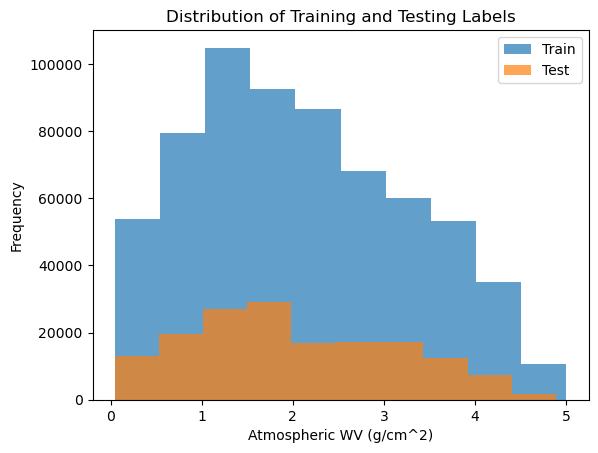

In [21]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')